In [168]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
from pathlib import Path
import math
import numpy as np
import sys
import matplotlib.pyplot as plt

sys.path.append(str(Path(os.getcwd()).parent))
from data_utilities import convert_age_from_days_to_years, extractqrcode, draw_age_distribution, calculate_code_age_distribution

### Total no. of artifacts in dataset

In [169]:
DATASET_PATH = Path('/mnt/datasets/95k_depthmap_trainingdata')

In [170]:
artifacts = pd.read_csv(DATASET_PATH / 'labels/training.csv')
print("Total no. of artifacts:", len(artifacts))
artifacts.head()

Total no. of artifacts: 96026


artifact  \
0  pc_1583438052-nxew87bcv0_1591122011044_100_000.p   
1  pc_1583438052-nxew87bcv0_1591122011044_100_004.p   
2  pc_1583438052-nxew87bcv0_1591122011044_100_005.p   
3  pc_1583438052-nxew87bcv0_1591122011044_100_006.p   
4  pc_1583438052-nxew87bcv0_1591122011044_100_007.p   

                                        storage_path  height  weight  key  \
0  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   
1  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   
2  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   
3  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   
4  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   

    age  
0  1260  
1  1260  
2  1260  
3  1260  
4  1260

In [171]:
#adding the Years column into dataframe
artifacts['Years'] = artifacts.apply(convert_age_from_days_to_years, axis=1)
artifacts.head()

artifact  \
0  pc_1583438052-nxew87bcv0_1591122011044_100_000.p   
1  pc_1583438052-nxew87bcv0_1591122011044_100_004.p   
2  pc_1583438052-nxew87bcv0_1591122011044_100_005.p   
3  pc_1583438052-nxew87bcv0_1591122011044_100_006.p   
4  pc_1583438052-nxew87bcv0_1591122011044_100_007.p   

                                        storage_path  height  weight  key  \
0  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   
1  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   
2  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   
3  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   
4  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   

    age  Years  
0  1260      3  
1  1260      3  
2  1260      3  
3  1260      3  
4  1260      3

### Total no. of children in the dataset

In [172]:
artifacts['qrcode'] = artifacts.apply(extractqrcode, axis=1)
scans = artifacts.drop_duplicates(subset='qrcode', keep='first')
print("Total no. of children:", len(scans))
scans.head()

Total no. of children: 4858


artifact  \
0   pc_1583438052-nxew87bcv0_1591122011044_100_000.p   
11  pc_1583438084-zkafuhr4xx_1591122031563_100_000.p   
24  pc_1583438117-71v1y4z0gd_1592711198959_100_000.p   
33  pc_1583438117-spfyeecneo_1591122016705_100_000.p   
48  pc_1583438127-xt6z0e0tsu_1591122024547_100_000.p   

                                         storage_path  height  weight  key  \
0   qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6   10.30  100   
11  qrcode/1583438084-zkafuhr4xx/measure/159112203...   104.4   14.80  100   
24  qrcode/1583438117-71v1y4z0gd/measure/159271119...   104.1   14.75  100   
33  qrcode/1583438117-spfyeecneo/measure/159112201...    98.3   12.55  100   
48  qrcode/1583438127-xt6z0e0tsu/measure/159112202...    89.7   11.50  100   

     age  Years                 qrcode  
0   1260      3  1583438052-nxew87bcv0  
11  1283      4  1583438084-zkafuhr4xx  
24  1398      4  1583438117-71v1y4z0gd  
33  1640      4  1583438117-spfyeecneo  
48   140      0  1583438127-xt6z0e0tsu

In [206]:
scans.describe()

height       weight          key           age        Years
count  4858.000000  4858.000000  4858.000000   4858.000000  4858.000000
mean     86.552491    10.951952   119.711198    934.587073     2.569164
std      11.742379     2.586094    40.019281   1133.370280     3.124526
min       7.900000     3.200000   100.000000      0.000000     0.000000
25%      77.925000     9.000000   100.000000    342.000000     1.000000
50%      88.050000    11.100000   100.000000    933.000000     3.000000
75%      95.600000    12.850000   101.000000   1420.750000     4.000000
max     114.700000    19.000000   202.000000  18179.000000    50.000000

2021-03-22 09:16:11,010 - INFO - 0     889
1     785
2     712
3     895
4     974
5     587
6       1
50     15
Name: Years, dtype: int64 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 24


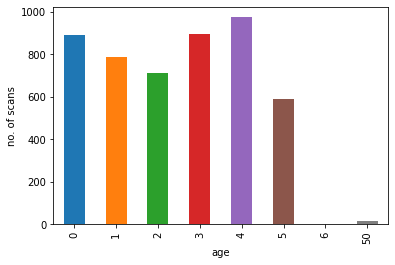

In [173]:
plt.figure()
draw_age_distribution(scans)
plt.show()

101    39059
100    24872
102    23301
202     6378
201     1292
200     1124
Name: key, dtype: int64


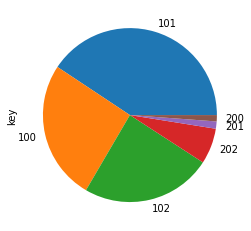

In [226]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(artifacts['key'].value_counts())
_ = artifacts['key'].value_counts().plot(kind='pie')

In [175]:
calculate_code_age_distribution(artifacts)

0     1     2     3      4
codes                               
100    5023   512  3312  5536   6564
101    7550   779  3705  9142  11086
102    4825   477  2723  5134   6230
200      80   857   162     0      7
201     163   883   201     8      0
202     622  4662   984    59     14

In [176]:
calculate_code_age_distribution(scans)

0    1    2    3    4
codes                         
100    671   75  492  793  901
101     67   17   37   51   46
102     57   14   37   42   25
200     10  106   20    0    1
201     11   54   15    1    0
202     73  519  111    8    1

### Distribution of height, weight and age against each other

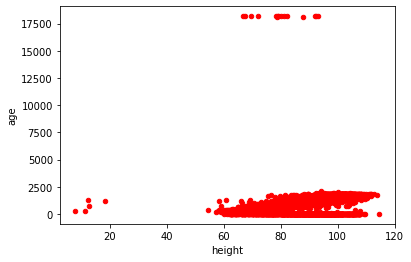

In [177]:
#distribution of height against age
height_vs_age = scans.plot.scatter(x='height', y='age', c='red')

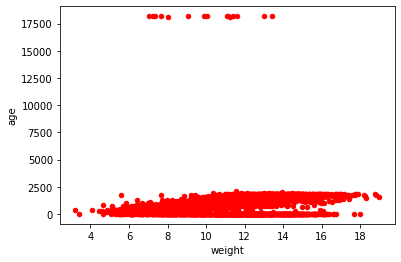

In [178]:
#distribution of weight against age
weight_vs_age = scans.plot.scatter(x='weight', y='age', c='red')

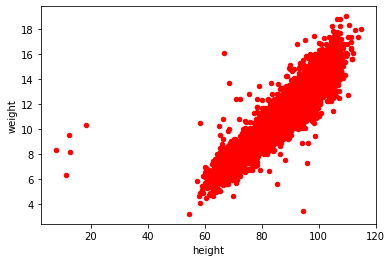

In [179]:
## distribution of height against weight
weight_vs_height = scans.plot.scatter(x='height', y='weight', c='red')

## Analyze outliers: 1) age, 2) weight, 3) height, 4) pixel values

In [180]:
import pickle
from tqdm import tqdm

def get_qrcode(artifact: str) -> str:
    return artifact.split('/')[1]

def get_path(row: pd.Series) -> str:
    return f"{str(DATASET_PATH)}/scans/{row.qrcode}/{row.key}/{row.artifact}"

### 1) Check age

In [262]:
# Children should be between 6 months and 6 years, otherwise we assume something went wrong

unusual_age_artifacts = artifacts[(artifacts.Years < 1) | (artifacts.Years > 6)]
print("No. of unusual age artifacts: ", len(unusual_age_artifacts))

unusual_age_drop_dupl = unusual_age_artifacts.drop_duplicates(subset='qrcode', keep='first')
print("No. of unique outlier qrcodes for age: ", len(unusual_age_drop_dupl))

unusual_age_drop_dupl.head()

No. of unusual age artifacts:  18418
No. of unique outlier qrcodes for age:  1024


artifact  \
48    pc_1583438127-xt6z0e0tsu_1591122024547_100_000.p   
637   pc_1583462523-zolqj1h1so_1591122114251_100_000.p   
669   pc_1583462542-nvwrue6sak_1591122146773_100_000.p   
1020  pc_1583465210-i5o9ye0f7y_1591428063476_100_000.p   
1025  pc_1583465223-o48oq5cow7_1591428073575_100_000.p   

                                           storage_path  height  weight  key  \
48    qrcode/1583438127-xt6z0e0tsu/measure/159112202...    89.7   11.50  100   
637   qrcode/1583462523-zolqj1h1so/measure/159112211...    93.9   12.85  100   
669   qrcode/1583462542-nvwrue6sak/measure/159112214...    97.7   12.45  100   
1020  qrcode/1583465210-i5o9ye0f7y/measure/159142806...    86.1   10.80  100   
1025  qrcode/1583465223-o48oq5cow7/measure/159142807...    90.6   10.90  100   

      age  Years                 qrcode  \
48    140      0  1583438127-xt6z0e0tsu   
637   145      0  1583462523-zolqj1h1so   
669   107      0  1583462542-nvwrue6sak   
1020    0      0  1583465210-i5o9ye0f7y   
1025    0      0  1583465223-o48oq5cow7   

                                                   path  
48    /mnt/datasets/95k_depthmap_trainingdata/scans/...  
637   /mnt/datasets/95k_depthmap_trainingdata/scans/...  
669   /mnt/datasets/95k_depthmap_trainingdata/scans/...  
1020  /mnt/datasets/95k_depthmap_trainingdata/scans/...  
1025  /mnt/datasets/95k_depthmap_trainingdata/scans/...

##### Check age < 6 months

In [276]:
unusual_age_artifacts_lowerbound = artifacts[artifacts.age < 365/2]
print("No. of unusual age artifacts, younger than 365/2 days: ", len(unusual_age_artifacts_lowerbound))

drop_dupl_age_lowerbound = unusual_age_artifacts_lowerbound.drop_duplicates(subset='qrcode', keep='first')
print("No. of unique outlier qrcodes, younger than 365/2 days: ", len(drop_dupl_age_lowerbound))

drop_dupl_age_lowerbound.head()

No. of unusual age artifacts, younger than 365/2 days:  18263
No. of unique outlier qrcodes, younger than 365/2 days:  1009


artifact  \
48    pc_1583438127-xt6z0e0tsu_1591122024547_100_000.p   
637   pc_1583462523-zolqj1h1so_1591122114251_100_000.p   
669   pc_1583462542-nvwrue6sak_1591122146773_100_000.p   
1020  pc_1583465210-i5o9ye0f7y_1591428063476_100_000.p   
1025  pc_1583465223-o48oq5cow7_1591428073575_100_000.p   

                                           storage_path  height  weight  key  \
48    qrcode/1583438127-xt6z0e0tsu/measure/159112202...    89.7   11.50  100   
637   qrcode/1583462523-zolqj1h1so/measure/159112211...    93.9   12.85  100   
669   qrcode/1583462542-nvwrue6sak/measure/159112214...    97.7   12.45  100   
1020  qrcode/1583465210-i5o9ye0f7y/measure/159142806...    86.1   10.80  100   
1025  qrcode/1583465223-o48oq5cow7/measure/159142807...    90.6   10.90  100   

      age  Years                 qrcode  \
48    140      0  1583438127-xt6z0e0tsu   
637   145      0  1583462523-zolqj1h1so   
669   107      0  1583462542-nvwrue6sak   
1020    0      0  1583465210-i5o9ye0f7y   
1025    0      0  1583465223-o48oq5cow7   

                                                   path  
48    /mnt/datasets/95k_depthmap_trainingdata/scans/...  
637   /mnt/datasets/95k_depthmap_trainingdata/scans/...  
669   /mnt/datasets/95k_depthmap_trainingdata/scans/...  
1020  /mnt/datasets/95k_depthmap_trainingdata/scans/...  
1025  /mnt/datasets/95k_depthmap_trainingdata/scans/...

##### Save outlier qr-codes for children < 6 months 

In [278]:
unusual_qrcodes_age_young = [get_qrcode(artifact) for artifact in drop_dupl_age_lowerbound.storage_path]
print(len(drop_dupl_age_lowerbound))
set(unusual_qrcodes_age_young)
print(unusual_qrcodes_age_young[:10])

1009
['1583438127-xt6z0e0tsu', '1583462523-zolqj1h1so', '1583462542-nvwrue6sak', '1583465210-i5o9ye0f7y', '1583465223-o48oq5cow7', '1583465279-x22pprs96h', '1583465285-korju92su7', '1583465354-bpwt1kjvie', '1583465441-o63jswqdi6', '1583509239-rm7c0wryz7']


#### Check age > 6 years

In [279]:
unusual_age_artifacts_upperbound = artifacts[artifacts.Years > 6]
print("No. of unusual age artifacts, older than 6 years: ", len(unusual_age_artifacts_upperbound))

drop_dupl_age_upperbound = unusual_age_artifacts_upperbound.drop_duplicates(subset='qrcode', keep='first')
print("No. of unique outlier qrcodes, older than 6 years: ", len(drop_dupl_age_upperbound))

drop_dupl_age_upperbound.head()

No. of unusual age artifacts, older than 6 years:  155
No. of unique outlier qrcodes, older than 6 years:  15


artifact  \
1847   pc_1583710796-p68osilppn_1591501060917_100_000.p   
2352   pc_1583831904-13qoxucgul_1591468763710_100_001.p   
3942   pc_1584751648-u50v4ryc54_1591501247986_100_000.p   
8023   pc_1585001805-bv723pvcy0_1591680090254_100_004.p   
22137  pc_1585361240-nievyiqbdv_1592804308041_100_000.p   

                                            storage_path  height  weight  key  \
1847   qrcode/1583710796-p68osilppn/measure/159150106...    78.6    8.05  100   
2352   qrcode/1583831904-13qoxucgul/measure/159146876...    87.8   11.25  100   
3942   qrcode/1584751648-u50v4ryc54/measure/159150124...    82.1    9.90  100   
8023   qrcode/1585001805-bv723pvcy0/measure/159168009...    93.3   11.60  100   
22137  qrcode/1585361240-nievyiqbdv/measure/159280430...    80.2   11.10  100   

         age  Years                 qrcode  \
1847   18144     50  1583710796-p68osilppn   
2352   18146     50  1583831904-13qoxucgul   
3942   18158     50  1584751648-u50v4ryc54   
8023   18176     50  1585001805-bv723pvcy0   
22137  18166     50  1585361240-nievyiqbdv   

                                                    path  
1847   /mnt/datasets/95k_depthmap_trainingdata/scans/...  
2352   /mnt/datasets/95k_depthmap_trainingdata/scans/...  
3942   /mnt/datasets/95k_depthmap_trainingdata/scans/...  
8023   /mnt/datasets/95k_depthmap_trainingdata/scans/...  
22137  /mnt/datasets/95k_depthmap_trainingdata/scans/...

##### Save outlier qr-codes for children > 6 years

In [266]:
unusual_qrcodes_age_old = [get_qrcode(artifact) for artifact in drop_dupl_age_upperbound.storage_path]
print(len(unusual_qrcodes_age_old))
set(unusual_qrcodes_age_old)
print(unusual_qrcodes_age_old)

15
['1583710796-p68osilppn', '1583831904-13qoxucgul', '1584751648-u50v4ryc54', '1585001805-bv723pvcy0', '1585361240-nievyiqbdv', '1584998005-c5ddnj0vuc', '1584751846-e0ro1v86r2', '1584996738-hyxlj4cees', '1585011032-l23rao0l8r', '1585355880-o0kqvrzncj', '1585005264-o4vjkmj3o5', '1584995539-iry2pwtgjy', '1585274328-7g4vj56tk8', '1584995460-ewet5gjfer', '1585001723-az25md2fir']


### 2) Check weight

In [280]:
# Children should weigh between 5 kg and 30 kg, otherwise we assume something went wrong (from WHO tables)

unusual_weight_artifacts = artifacts[(artifacts.weight < 5.0) | (artifacts.weight > 30.0)]
print("No. of unusual weight artifacts: ", len(unusual_weight_artifacts))

drop_dupl_weight = unusual_weight_artifacts.drop_duplicates(subset='qrcode', keep='first')
print("No. of unique outlier qrcodes for weight: ", len(drop_dupl_weight))

drop_dupl_weight.head()

Number of unusual weight artifacts:  107
No. of unique outlier qrcodes for weight:  12


artifact  \
86407  pc_1585366271-ok8vyfgcdw_1593022561906_102_014.p   
87752  pc_1585268854-t9dc711wl2_1597148937690_200_000.p   
88366  pc_1583464618-et67nim5pv_1596999352189_201_000.p   
90499  pc_1584997150-17hbdbbvst_1595409245154_202_000.p   
90635  pc_1584998076-071u80jhgb_1597092612758_202_000.p   

                                            storage_path  height  weight  key  \
86407  qrcode/1585366271-ok8vyfgcdw/measure/159302256...    94.5     3.4  102   
87752  qrcode/1585268854-t9dc711wl2/measure/159714893...    58.0     4.6  200   
88366  qrcode/1583464618-et67nim5pv/measure/159699935...    58.5     4.1  201   
90499  qrcode/1584997150-17hbdbbvst/measure/159540924...    61.5     4.7  202   
90635  qrcode/1584998076-071u80jhgb/measure/159709261...    54.4     3.2  202   

       age  Years                 qrcode  \
86407    0      0  1585366271-ok8vyfgcdw   
87752  289      1  1585268854-t9dc711wl2   
88366  333      1  1583464618-et67nim5pv   
90499  175      0  1584997150-17hbdbbvst   
90635  347      1  1584998076-071u80jhgb   

                                                    path  
86407  /mnt/datasets/95k_depthmap_trainingdata/scans/...  
87752  /mnt/datasets/95k_depthmap_trainingdata/scans/...  
88366  /mnt/datasets/95k_depthmap_trainingdata/scans/...  
90499  /mnt/datasets/95k_depthmap_trainingdata/scans/...  
90635  /mnt/datasets/95k_depthmap_trainingdata/scans/...

##### Save outlier qr-codes for weight < 5 kg and > 30 kg

In [267]:
unusual_qrcodes_weight = [get_qrcode(artifact) for artifact in drop_dupl_weight.storage_path]
print(len(unusual_qrcodes_weight))
set(unusual_qrcodes_weight)
print(unusual_qrcodes_weight)

12
['1585366271-ok8vyfgcdw', '1585268854-t9dc711wl2', '1583464618-et67nim5pv', '1584997150-17hbdbbvst', '1584998076-071u80jhgb', '1585003269-r6u05tzkj7', '1585008564-6b2vy7vcbe', '1585271708-jc2k2d03jd', '1585273422-lr31sn53h1', '1585273699-0o50bij8vh', '1585353338-boa4phzps5', '1585366660-6cqmyjhmxu']


### 3) Check height

In [268]:
# Children should be between 40cm and 150cm tall, otherwise we assume something went wrong
unusual_height_artifacts = artifacts[(artifacts.height < 40.) | (artifacts.height > 150.)]
unusual_height_artifacts.head()

artifact  \
2643  pc_1583855791-ldfc59ywg5_1591621942032_100_000.p   
2644  pc_1583855791-ldfc59ywg5_1591621942032_100_001.p   
2645  pc_1583855791-ldfc59ywg5_1591621942032_100_002.p   
2646  pc_1583855791-ldfc59ywg5_1591621942032_100_003.p   
2647  pc_1583855791-ldfc59ywg5_1591621942032_100_004.p   

                                           storage_path  height  weight  key  \
2643  qrcode/1583855791-ldfc59ywg5/measure/159162194...    12.3    12.6  100   
2644  qrcode/1583855791-ldfc59ywg5/measure/159162194...    12.3    12.6  100   
2645  qrcode/1583855791-ldfc59ywg5/measure/159162194...    12.3    12.6  100   
2646  qrcode/1583855791-ldfc59ywg5/measure/159162194...    12.3    12.6  100   
2647  qrcode/1583855791-ldfc59ywg5/measure/159162194...    12.3    12.6  100   

       age  Years                 qrcode  \
2643  1357      4  1583855791-ldfc59ywg5   
2644  1357      4  1583855791-ldfc59ywg5   
2645  1357      4  1583855791-ldfc59ywg5   
2646  1357      4  1583855791-ldfc59ywg5   
2647  1357      4  1583855791-ldfc59ywg5   

                                                   path  
2643  /mnt/datasets/95k_depthmap_trainingdata/scans/...  
2644  /mnt/datasets/95k_depthmap_trainingdata/scans/...  
2645  /mnt/datasets/95k_depthmap_trainingdata/scans/...  
2646  /mnt/datasets/95k_depthmap_trainingdata/scans/...  
2647  /mnt/datasets/95k_depthmap_trainingdata/scans/...

In [269]:
print("No. of unusual height artifacts: ", len(unusual_height_artifacts))

drop_dupl_height = unusual_height_artifacts.drop_duplicates(subset='qrcode', keep='first')
print("No. of unique outlier qrcodes for height: ", len(drop_dupl_height))

drop_dupl_height.head()

No. of unusual height artifacts:  158
No. of unique outlier qrcodes for height:  6


artifact  \
2643   pc_1583855791-ldfc59ywg5_1591621942032_100_000.p   
2956   pc_1583997882-3jqstr1119_1591123012106_100_000.p   
6644   pc_1584998372-d85ogmqucw_1591618365119_100_000.p   
17176  pc_1585274424-3oqa4i262a_1592534557864_100_000.p   
23808  pc_1585366118-qao4zsk0m3_1593021766372_100_000.p   

                                            storage_path  height  weight  key  \
2643   qrcode/1583855791-ldfc59ywg5/measure/159162194...    12.3   12.60  100   
2956   qrcode/1583997882-3jqstr1119/measure/159112301...    11.3    6.35  100   
6644   qrcode/1584998372-d85ogmqucw/measure/159161836...    18.5   10.30  100   
17176  qrcode/1585274424-3oqa4i262a/measure/159253455...    12.3    9.50  100   
23808  qrcode/1585366118-qao4zsk0m3/measure/159302176...    12.7    8.15  100   

        age  Years                 qrcode  \
2643   1357      4  1583855791-ldfc59ywg5   
2956    272      1  1583997882-3jqstr1119   
6644   1233      3  1584998372-d85ogmqucw   
17176  1270      3  1585274424-3oqa4i262a   
23808   696      2  1585366118-qao4zsk0m3   

                                                    path  
2643   /mnt/datasets/95k_depthmap_trainingdata/scans/...  
2956   /mnt/datasets/95k_depthmap_trainingdata/scans/...  
6644   /mnt/datasets/95k_depthmap_trainingdata/scans/...  
17176  /mnt/datasets/95k_depthmap_trainingdata/scans/...  
23808  /mnt/datasets/95k_depthmap_trainingdata/scans/...

##### Save outlier qr-codes for height < 40 cm and > 150 cm

In [272]:
unusual_qrcodes_height = [get_qrcode(artifact) for artifact in drop_dupl_height.storage_path]
print(len(unusual_qrcodes_height))
set(unusual_qrcodes_height)
print(unusual_qrcodes_height)

6
['1583855791-ldfc59ywg5', '1583997882-3jqstr1119', '1584998372-d85ogmqucw', '1585274424-3oqa4i262a', '1585366118-qao4zsk0m3', '1585360775-fa64muouel']


### 4) Check pixel values

In [275]:
# check for depthmap pixel values < 0 and > 10, values found by MH through investigation
artifacts['qrcode'] = artifacts.storage_path.apply(get_qrcode)
artifacts['path'] = artifacts.apply(get_path, axis=1)

In [233]:
artifacts.head()

artifact  \
0  pc_1583438052-nxew87bcv0_1591122011044_100_000.p   
1  pc_1583438052-nxew87bcv0_1591122011044_100_004.p   
2  pc_1583438052-nxew87bcv0_1591122011044_100_005.p   
3  pc_1583438052-nxew87bcv0_1591122011044_100_006.p   
4  pc_1583438052-nxew87bcv0_1591122011044_100_007.p   

                                        storage_path  height  weight  key  \
0  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   
1  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   
2  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   
3  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   
4  qrcode/1583438052-nxew87bcv0/measure/159112201...    86.6    10.3  100   

    age  Years                 qrcode  \
0  1260      3  1583438052-nxew87bcv0   
1  1260      3  1583438052-nxew87bcv0   
2  1260      3  1583438052-nxew87bcv0   
3  1260      3  1583438052-nxew87bcv0   
4  1260      3  1583438052-nxew87bcv0   

                                                path  
0  /mnt/datasets/95k_depthmap_trainingdata/scans/...  
1  /mnt/datasets/95k_depthmap_trainingdata/scans/...  
2  /mnt/datasets/95k_depthmap_trainingdata/scans/...  
3  /mnt/datasets/95k_depthmap_trainingdata/scans/...  
4  /mnt/datasets/95k_depthmap_trainingdata/scans/...

In [232]:
! ls {artifacts.path.iloc[0]}

/mnt/datasets/95k_depthmap_trainingdata/scans/1583438052-nxew87bcv0/100/pc_1583438052-nxew87bcv0_1591122011044_100_000.p


In [234]:
unusual_pixel_artifacts = []
for path in tqdm(artifacts['path']):
    depthmap, targets = pickle.load(open(path, "rb"))
    max_value = depthmap.max()
    if max_value >= 10:
        unusual_pixel_artifacts.append(path)
        print(f"{path} has a (unexpectedly big) maximal pixel value of {max_value}")
    min_value = depthmap.min()
    if min_value < 0:
        unusual_pixel_artifacts.append(path)
        print(f"{path} has a (unexpectedly small) minimal pixel value of {max_value}")

 47%|████▋     | 45181/96026 [16:11<21:24, 39.57it/s]  

/mnt/datasets/95k_depthmap_trainingdata/scans/1585010027-xb21f31tvj/101/pc_1585010027-xb21f31tvj_1592674994326_101_015.p has a (unexpectedly big) maximal pixel value of 714286.0


100%|██████████| 96026/96026 [33:14<00:00, 48.13it/s]  


In [235]:
unusual_pixel_artifacts

['/mnt/datasets/95k_depthmap_trainingdata/scans/1585010027-xb21f31tvj/101/pc_1585010027-xb21f31tvj_1592674994326_101_015.p']

##### Save outlier qr-codes for depthmap pixel values < 0 and > 10

In [274]:
unusual_qrcodes_pixel = str(unusual_pixel_artifacts).split('/')[5]
print(len(unusual_pixel_artifacts))
print(unusual_qrcodes_pixel)

1
1585010027-xb21f31tvj
